In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

import pims

import matplotlib.ticker as ticker

from skimage import filters, util
from scipy import ndimage
from ipywidgets import interact, IntSlider




deprecated pixel format used, make sure you did set range correctly


Frame([[525, 524, 587, ..., 516, 532, 509],
       [531, 594, 514, ..., 603, 518, 516],
       [557, 619, 549, ..., 599, 558, 551],
       ...,
       [498, 537, 525, ..., 663, 559, 560],
       [548, 529, 576, ..., 560, 545, 484],
       [506, 502, 529, ..., 524, 582, 484]], dtype=uint16)
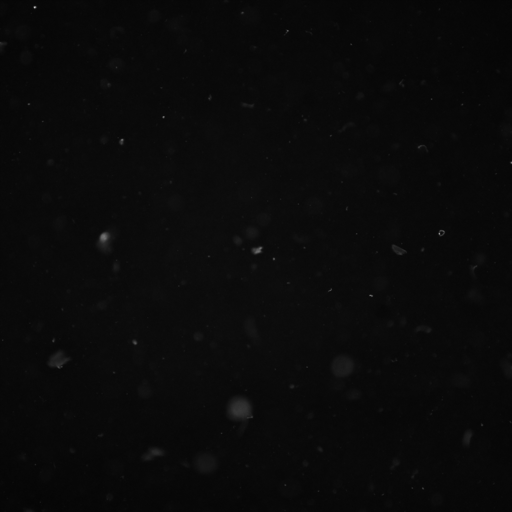

In [2]:
# Load the images
frames = pims.ImageSequence('/home/shichen/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/fig_4/cell_eater_1/Pos0/*.tif')
video = pims.Video('/home/shichen/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_4/image_slices/cell_eater_bf.avi')
cy5_frames = frames[1::3]
cy5_frames[0]

In [3]:
import numpy as np
np.__config__.show()


blas_info:
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/shichen/anaconda3/envs/active_matter_amd/lib']
    include_dirs = ['/home/shichen/anaconda3/envs/active_matter_amd/include']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/shichen/anaconda3/envs/active_matter_amd/lib']
    include_dirs = ['/home/shichen/anaconda3/envs/active_matter_amd/include']
    language = c
lapack_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas']
    library_dirs = ['/home/shichen/anaconda3/envs/active_matter_amd/lib']
    language = f77
lapack_opt_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas', 'cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/shichen/anaconda3/envs/active_matter_amd/lib']
    language = c
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    inc

In [4]:
len(cy5_frames)

325

Frame([[1367, 1528, 1432, ..., 1369, 1536, 1326],
       [1480, 1544, 1546, ..., 1588, 1513, 1433],
       [1383, 1553, 1668, ..., 1583, 1544, 1302],
       ...,
       [1528, 1509, 1592, ..., 1619, 1530, 1387],
       [1490, 1648, 1497, ..., 1460, 1588, 1488],
       [1327, 1499, 1520, ..., 1565, 1454, 1435]], dtype=uint16)
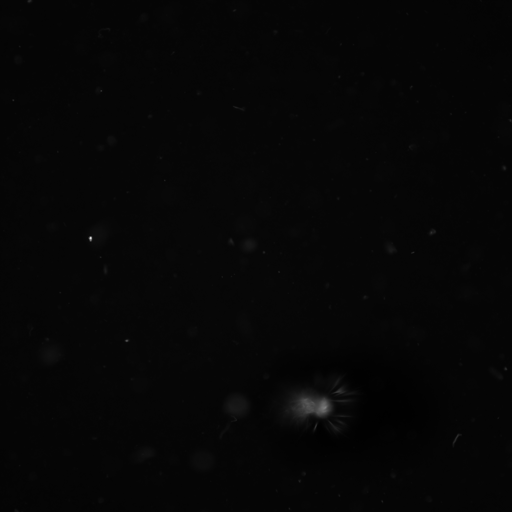

In [5]:
cy5_frames[103]

In [6]:


def preprocess_single_image(img, min_size, max_size):
    # Use Otsu's method to determine the threshold
    threshold_value = filters.threshold_otsu(img)
    # Apply the threshold to binarize the image
    img = img > threshold_value  
    # Perform binary dilation
    ndimage.binary_dilation(img, output=img)
    ndimage.binary_dilation(img, output=img)
    # Label the connected components in the image
    labels, _ = ndimage.label(img)
    # Filter the components based on their size
    size = np.bincount(labels.ravel())
    mask_size = (size > min_size) & (size < max_size)
    mask_size[0] = 0
    img = mask_size[labels]
    return img

min_size = 200  # adjust as needed
max_size = 5000  # adjust as needed

# List comprehension for sequential processing
frames_cy5_processed = [preprocess_single_image(img, min_size, max_size) for img in cy5_frames]


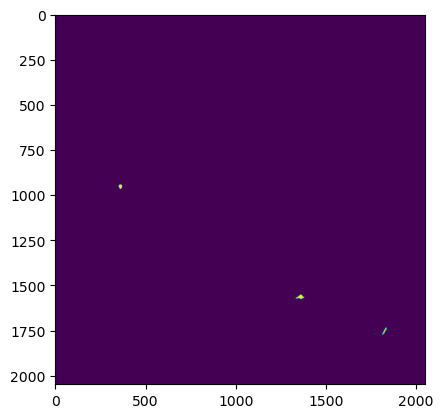

In [7]:
plt.imshow(frames_cy5_processed[103]);

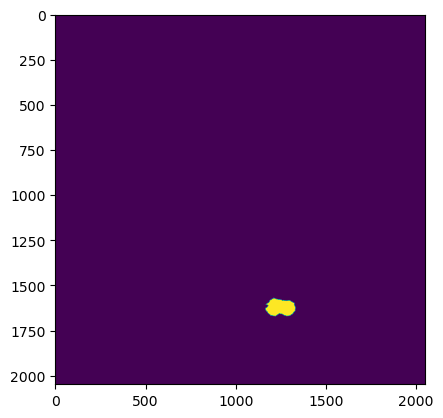

In [8]:

def preprocess_single_image(img, min_size, max_size):
    # Use Otsu's method to determine the threshold
    threshold_value = filters.threshold_otsu(img)
    # Apply the threshold to binarize the image
    img = img > threshold_value  
    # Perform binary dilation
    ndimage.binary_dilation(img, output=img)
    ndimage.binary_dilation(img, output=img)
    # Label the connected components in the image
    labels, _ = ndimage.label(img)
    # Filter the components based on their size
    size = np.bincount(labels.ravel())
    mask_size = (size > min_size) & (size < max_size)
    mask_size[0] = 0
    img = mask_size[labels]
    return img

min_size = 3000  # adjust as needed
max_size = 500000  # adjust as needed

# Only process the first image slice
img = cy5_frames[103]
processed_img = preprocess_single_image(img, min_size, max_size)
plt.imshow(processed_img);

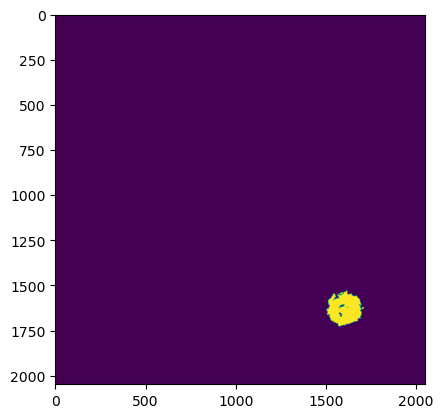

In [9]:

def preprocess_single_image(img, min_size, max_size):
    # Calculate thresholds using Otsu's and Triangle methods
    threshold_otsu = filters.threshold_otsu(img)
    threshold_triangle = filters.threshold_triangle(img)
    # Use a weighted average of both thresholds
    threshold_value = 0.20 * threshold_otsu + 0.8 * threshold_triangle
    # Apply the threshold to binarize the image
    img = img > threshold_value   
    # Perform binary dilation
    ndimage.binary_dilation(img, output=img)
    ndimage.binary_dilation(img, output=img)
    # Label the connected components in the image
    labels, _ = ndimage.label(img)
    # Filter the components based on their size
    size = np.bincount(labels.ravel())
    mask_size = (size > min_size) & (size < max_size)
    mask_size[0] = 0
    img = mask_size[labels]
    return img

min_size = 11300  # adjust as needed
max_size = 500000  # adjust as needed

# Only process the first image slice
img = cy5_frames[10]
processed_img = preprocess_single_image(img, min_size, max_size)
plt.imshow(processed_img);

In [10]:

def preprocess_images(img, min_size, max_size):
    # Calculate thresholds using Otsu's and Triangle methods
    threshold_otsu = filters.threshold_otsu(img)
    threshold_triangle = filters.threshold_triangle(img)
    # Use a weighted average of both thresholds
    threshold_value = 0.20 * threshold_otsu + 0.8 * threshold_triangle
    # Apply the threshold to binarize the image
    img = img > threshold_value   
    # Perform binary dilation
    ndimage.binary_dilation(img, output=img)
    ndimage.binary_dilation(img, output=img)
    # Label the connected components in the image
    labels, _ = ndimage.label(img)
    # Filter the components based on their size
    size = np.bincount(labels.ravel())
    mask_size = (size > min_size) & (size < max_size)
    mask_size[0] = 0
    img = mask_size[labels]
    # Calculate aster size as the size of the largest connected component
    aster_size = size[mask_size].max() if mask_size.any() else 0
    return img, aster_size

min_size = 12000  # adjust as needed
max_size = 500000  # adjust as needed

# Process all image slices
frames_processed, aster_sizes = zip(*[preprocess_images(img, min_size, max_size) for img in cy5_frames])


In [16]:
def preprocess_images(img, min_size, max_size):
    from skimage import filters
    from scipy import ndimage
    import numpy as np
    # Calculate thresholds using Otsu's and Triangle methods
    threshold_otsu = filters.threshold_otsu(img)
    threshold_triangle = filters.threshold_triangle(img)
    # Use a weighted average of both thresholds
    threshold_value = 0.20 * threshold_otsu + 0.8 * threshold_triangle
    # Apply the threshold to binarize the image
    img = img > threshold_value   
    # Perform binary dilation
    ndimage.binary_dilation(img, output=img)
    ndimage.binary_dilation(img, output=img)
    # Label the connected components in the image
    labels, _ = ndimage.label(img)
    # Filter the components based on their size
    size = np.bincount(labels.ravel())
    mask_size = (size > min_size) & (size < max_size)
    mask_size[0] = 0
    img = mask_size[labels]
    # Calculate aster size as the size of the largest connected component
    aster_size = size[mask_size].max() if mask_size.any() else 0
    return img, aster_size


min_size = 12000  # adjust as needed
max_size = 500000  # adjust as needed


In [17]:
import ipyparallel as ipp

with ipp.Cluster(n = 16) as rc:
    view = rc.load_balanced_view()
    
    # Submit the tasks
    async_result = view.map_async(preprocess_images, cy5_frames, [min_size]*len(cy5_frames), [max_size]*len(cy5_frames))
    
    # Wait for the results
    async_result.wait_interactive()
    
    # Retrieve the results
    frames_processed, aster_sizes = zip(*async_result.get())


Starting 16 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/16 [00:00<?, ?engine/s]

preprocess_images:   0%|          | 0/325 [00:00<?, ?tasks/s]

Stopping engine(s): 1689793235
engine set stopped 1689793235: {'engines': {'0': {'exit_code': 0, 'pid': 48672, 'identifier': '0'}, '1': {'exit_code': 0, 'pid': 48677, 'identifier': '1'}, '2': {'exit_code': 0, 'pid': 48679, 'identifier': '2'}, '3': {'exit_code': 0, 'pid': 48681, 'identifier': '3'}, '4': {'exit_code': 0, 'pid': 48687, 'identifier': '4'}, '5': {'exit_code': 0, 'pid': 48693, 'identifier': '5'}, '6': {'exit_code': 0, 'pid': 48699, 'identifier': '6'}, '7': {'exit_code': 0, 'pid': 48715, 'identifier': '7'}, '8': {'exit_code': 0, 'pid': 48734, 'identifier': '8'}, '9': {'exit_code': 0, 'pid': 48750, 'identifier': '9'}, '10': {'exit_code': 0, 'pid': 48766, 'identifier': '10'}, '11': {'exit_code': 0, 'pid': 48782, 'identifier': '11'}, '12': {'exit_code': 0, 'pid': 48798, 'identifier': '12'}, '13': {'exit_code': 0, 'pid': 48814, 'identifier': '13'}, '14': {'exit_code': 0, 'pid': 48830, 'identifier': '14'}, '15': {'exit_code': 0, 'pid': 48843, 'identifier': '15'}}, 'exit_code': 0}


In [18]:
# Function to plot a frame
def plot_frame(i):
    plt.imshow(frames_processed[i], cmap='gray')
    plt.show()

# Interactive widget to change frame
interact(plot_frame, i=IntSlider(min=0, max=len(frames_processed)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='i', max=324), Output()), _dom_classes=('widget-interact'…

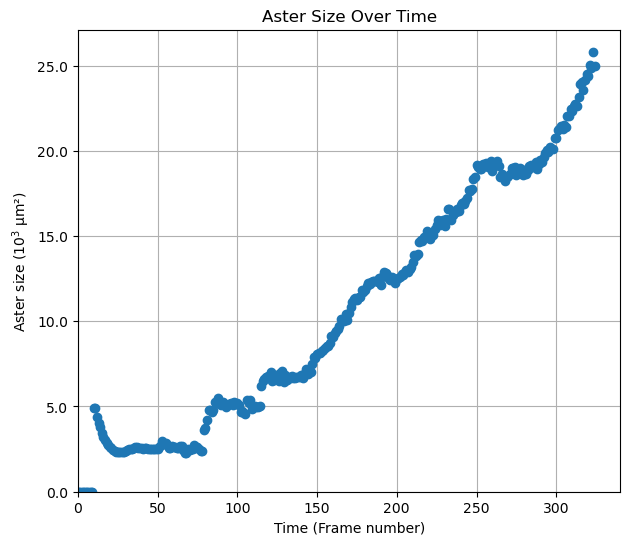

In [19]:
import matplotlib.pyplot as plt

# Assuming that the time between each frame is constant and equal to 1 time unit
time = range(len(aster_sizes))

area_per_pixel = 0.43**2  # µm²


aster_sizes_um = [size * area_per_pixel for size in aster_sizes]

fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(time, aster_sizes_um, 'o')
ax.set_title("Aster Size Over Time")
ax.set_xlabel("Time (Frame number)")
ax.set_ylabel("Aster size ($10^3$ µm²)")
ax.grid(True)

# Create your custom scientific formatter
f = lambda x, pos: f'{x * 1e-3:.1f}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(f))

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.show()

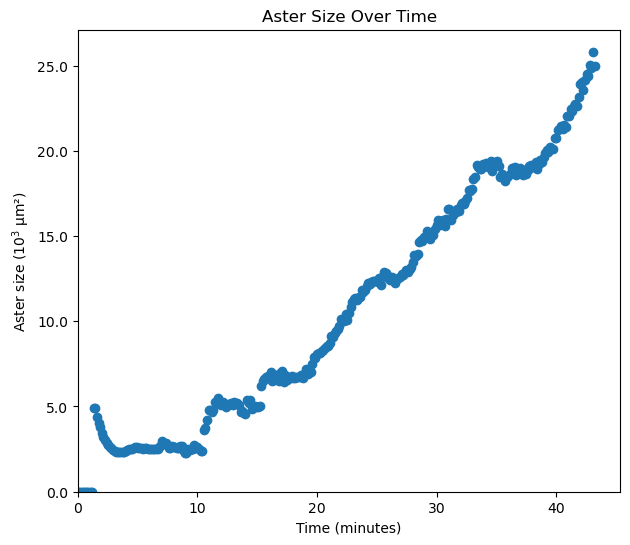

In [21]:
time_minutes = [t / 7.5 for t in range(len(aster_sizes))]

area_per_pixel = 0.43**2  # µm²


fig, ax = plt.subplots(figsize=(7, 6))

# Original data
ax.plot(time_minutes, aster_sizes_um, 'o', label="Actual sizes")  

# Titles and labels
ax.set_title("Aster Size Over Time")
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Aster size ($10^3$ µm²)")

# Create your custom scientific formatter
f = lambda x, pos: f'{x * 1e-3:.1f}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(f))

# Set x and y axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.show()
